In [16]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
#%matplotlib inline
#%matplotlib auto
import pylab as plt
import numpy
import random
import math
#

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Some toy codes and tests...

In [17]:
def hasConsecutiveDigits(n):
    #return 42 # replace with your solution
    n_str = str(n)
    #has_consecutive_digits = False
    n_consecutive_digits = 0
    for j,d in enumerate(n_str[1:]):
        if d==n_str[j]:
            # two consecutive digits are the same; increment counter:
            #n_consecutive_digits += 1
            n_consecutive_digits = True
            break
        #
    #
    # note: values >0 can evaluate True, though i guess not in an assert() statement.
    # so let's just do true/false, which means we can also exit early.
    #, otherwise we can actually get a count;
    #      the cost is basically the length of an integer vs a boolean.
    return n_consecutive_digits

def testHasConsecutiveDigits():
    print("Testing hasConsecutiveDigits()...", end="")
    assert(hasConsecutiveDigits(0) == False)
    assert(hasConsecutiveDigits(123456789) == False)
    assert(hasConsecutiveDigits(1212) == False)
    assert(hasConsecutiveDigits(1212111212) == True)
    assert(hasConsecutiveDigits(33) == True)
    assert(hasConsecutiveDigits(-1212111212) == True)
    print("Passed!")

testHasConsecutiveDigits()

Testing hasConsecutiveDigits()...Passed!


In [18]:
class Fibo_iterator(object):
    def __init__(self, n=0, verbose=False):
        #x0=1
        #x1=1
        #
        X = [1,1]
        #
        j_fibo=0
        self.__dict__.update(locals())
        #
        n = (n or 0)
        self.get_nth(n)   
    #
    def __repr__(self):
        return str(self.x)
    def __val__(self):
        return self.x
    @property
    def x(self):
        return self.get_current()
    #
    def get_current(self):
        return self.X[1]

    #
    def get_next(self):
        self.j_fibo+=1
        #
        if self.j_fibo<=2:
            return self.X[self.j_fibo-1]
        
        x = self.X[0] + self.X[1]
        self.X[0] = self.X[1]
        self.X[1] = x
        #
        return x
    #
    def get_prev(self):
        if self.j_fibo==0: return 1
        if self.j_fibo==1:
            self.j_fibo-=1
            return 1
        #
        x2 = self.X[1] - self.X[0]
        x1 = self.X[0]
        #x1 = self.X[0] - x2
        #
        self.X = [x2,x1]
        self.j_fibo-=1
        #
        #print('X: ', self.X)
        return self.X[-1]
    #
    def reset(self):
        self.__init__()
    def get_nth(self, n):
        # we could walk this backwards, always start over, or do this...
        while self.j_fibo>n:
            if self.verbose: print('preving: ', self.X)
            x = self.get_prev()
        #
        while self.j_fibo<n:
            if self.verbose: print("nexting: ", self.X)
            x = self.get_next()
        #
        return self.X[-1]
    #
#

In [19]:
def fibo_test_script_1():
    my_fibo = Fibo_iterator()
    fbs = [my_fibo.get_next() for _ in range(15)]
    #
    print(' fibos should be: {}'.format('1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987'))
    print('fibos: ', fbs)
    #
    for k in (4,5,7,10,4,3):
        print('{}: '.format(k), my_fibo.get_nth(k))
    #
    my_fibo = Fibo_iterator()
    print(my_fibo.get_nth(7))
    #print(my_fibo.get_prev())
    #print(my_fibo.get_prev())


    print(my_fibo.get_prev())

    print(my_fibo.get_next())

    print(my_fibo.get_nth(15))

    print(my_fibo.get_nth(10))

    print(my_fibo.get_nth(10))
    print(my_fibo.get_nth(15))
    print(my_fibo.get_nth(20))
    print(my_fibo.get_nth(15))


    my_fibo=Fibo_iterator(5)
    print(my_fibo.X)

In [41]:
class Random_circle_counter(object):
    def __init__(self, N=1000, x_min=-1., y_min=-1., x_max=1., y_max=1.):
        #
        Rx = random.Random()
        Ry = random.Random()
        #
        dx = x_max - x_min
        dy = y_max - y_min
        rx = .5*dx
        ry = .5*dy
        #
        #
        n_inside = 0
        n_outside = 0
        outsides = []
        insides = []
        for j in range(N):
            x = Rx.random()*dx + x_min
            y = Ry.random()*dy + y_min
            #
            #if x!=0:
            #    theta = math.atan(y/x)
            #else:
            #    theta = .5*numpy.pi*( 2.*(-.5 + (y>0)))
            #
            #if (x*x + y*y) > .5*(rx*rx + ry*ry):
            if y*y > ry*ry*(1.-x*x/rx**2.):
                # outside:
                outsides += [[x,y]]
                n_outside += 1
            else:
                insides += [[x,y]]
                n_inside += 1
        #
        self.__dict__.update(locals())
    #
    def plotit(self, fignum=None, ax=None):
        #
        if fignum is None and ax is None:
            fg=plt.figure()
            plt.clf()
            ax=plt.gca()
        #
        ax.plot(*zip(*self.insides), color='b', ls='', marker='.', label='insies')
        ax.plot(*zip(*self.outsides), color='r', ls='', marker='.', label='outsies')
        ax.legend(loc=0)
        

<IPython.core.display.Javascript object>


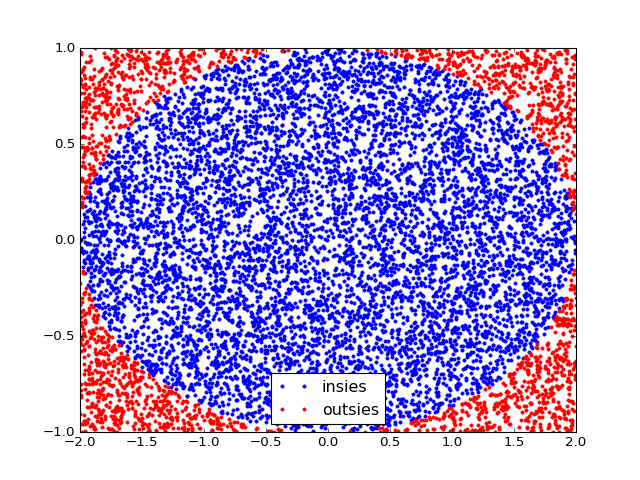

outsies area_factor:  0.2137  ::  0.21460183660255172


In [42]:
N=10000
RR = Random_circle_counter(N, x_min=-2., x_max=2., y_min=-1, y_max=1.)
RR.plotit()
print('outsies area_factor: ', RR.n_outside/float(N), ' :: ', (RR.dx*RR.dy - numpy.pi*RR.rx*RR.ry)/(RR.dx*RR.dy))